### **Задание проекта**

**Сервис аренды самокатов GoFast передал для анализа данные о поездках пользователяе из нескольких городов. Необходимо провести исследование и проверить некоторые гипотезы, которые могут помочь бизнесу компании.**

Для поездок по городу клиенты GoFast используют мобильное приложение.

Сервис без подписки (free): без абонентской платы, минута поездки — 8₽, старт начала поездки — 50₽.

Сервис c подпиской (Ultra): абонентская плата - 199₽ , минута поездки — 6₽, старт начала поездки бесплатный.

Отличный план проекта! На основе предоставленного текста можно сформулировать следующий список гипотез для проверки.

### Список гипотез для проверки в проекте

1.  **Гипотеза о времени поездки:** Пользователи с подпиской в среднем тратят на поездки **больше времени**, чем пользователи без подписки.
    *   **Нулевая гипотеза (H0):** Среднее время поездки пользователей с подпиской **равно** среднему времени поездки пользователей без подписки.
    *   **Альтернативная гипотеза (H1):** Среднее время поездки пользователей с подпиской **больше** среднего времени поездки пользователей без подписки.
    *   **Метод проверки:** Двухвыборочный t-тест (независимые выборки).

2.  **Гипотеза о расстоянии поездки:** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, **не превышает** 3130 метров.
    *   **Нулевая гипотеза (H0):** Среднее расстояние поездки подписчиков **≤ 3130 метров**.
    *   **Альтернативная гипотеза (H1):** Среднее расстояние поездки подписчиков **> 3130 метров**.
    *   **Метод проверки:** Одновыборочный t-тест (сравнение среднего одной выборки с заданным значением).

3.  **Гипотеза о выручке:** Помесячная выручка от пользователей с подпиской **статистически значимо выше**, чем выручка от пользователей без подписки.
    *   **Нулевая гипотеза (H0):** Средняя месячная выручка от пользователей с подпиской **равна** средней месячной выручке от пользователей без подписки.
    *   **Альтернативная гипотеза (H1):** Средняя месячная выручка от пользователей с подпиской **больше** средней месячной выручки от пользователей без подписки.
    *   **Метод проверки:** Двухвыборочный t-тест (независимые выборки) по агрегированным данным.

4.  **Гипотеза об обращениях в поддержку:** После обновления серверов **количество обращений в техническую поддержку значимо снизилось**.
    *   **Нулевая гипотеза (H0):** Среднее количество обращений после обновления **равно** среднему количеству обращений до обновления.
    *   **Альтернативная гипотеза (H1):** Среднее количество обращений после обновления **меньше** среднего количества обращений до обновления.
    *   **Метод проверки:** **Парный t-тест** (зависимые выборки).

5.  **Гипотеза для акции с промокодами (Биномиальное распределение):**
    *   **Описание:** Вероятность того, что пользователь продлит подписку после пробного периода, составляет 10% (p=0.1). Необходимо найти минимальное количество промокодов (N), которое нужно разослать, чтобы вероятность того, что продлят подписку **менее 100 пользователей**, была примерно 5%.

6.  **Гипотеза для push-уведомлений (Нормальная аппроксимация биномиального распределения):**
    *   **Описание:** Вероятность открытия уведомления клиентом составляет 40% (p=0.4). Планируется разослать 1 млн уведомлений (n=1,000,000). Необходимо оценить вероятность того, что уведомление откроют **не более 399,5 тыс.** пользователей.
  

In [ ]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom

#### Шаг 1. Загрузка данных

In [ ]:
users_go = pd.read_csv('/datasets/users_go.csv')
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<div class="alert alert-block alert-info">
<b>Комментарий:</b>

Датафрейм содержит информацию о пользователях, городе и подписке.

Столбцы users_go.csv:
    
user_id	- уникальный идентификатор пользователя
    
name - имя пользователя
    
age - возраст
    
city- город
    
subscription_type - тип подписки (free, ultra) </div>

In [ ]:
rides_go = pd.read_csv('/datasets/rides_go.csv')
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<div class="alert alert-block alert-info">
<b>Комментарий:</b>

Датафрейм содержит информацию о поездках пользователей.

Столбцы rides_go.csv:
    
user_id	- уникальный идентификатор пользователя
    
distance - расстояние, которое пользователь проехал в метрах
    
duration - продолжительность поездки в минутах
    
date - дата поездки </div>

In [ ]:
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions_go

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div class="alert alert-block alert-info">
<b>Комментарий:</b>

Датафрейм содержит информацию о подписке и стоимости поездки пользователей.

Столбцы subscriptions_go.csv:
    
subscription_type -	тип подписки
    
minute_price - стоимость минуты поездки по подписке
    
start_ride_price - стоимость начала поездки
    
subscription_fee - стоимость ежемесячного платежа </div>

##### Информация о датафреймах

In [ ]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [ ]:
users_go.duplicated().sum() # количество дубликатов

31

In [ ]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [ ]:
rides_go.duplicated().sum() # количество дубликатов

0

In [ ]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


<div class="alert alert-block alert-info">
<b>Вывод:</b>

1. Датафрейм users_go - 1565 записи, пропусков нет, явных дубликатов - 31.

2. Датафрейм rides_go - 18068 записи, пропусков и явных дубликатов нет, фомат даты некорректный (object).

3. Датафрейм subscriptions_go - 2 записи, пропусков и дубликатов нет.

4. Наименования столбцов датафреймов в змеином регистре. </div>

#### Шаг 2. Предобработка данных

##### Приведение столбца "date" rides_go к типу даты pandas

In [ ]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Создание нового столбца rides_go с номером месяца на основе "date"

In [ ]:
rides_go['month'] = rides_go['date'].dt.month
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


##### Удаление дубликатов в датафрейме users_go

In [ ]:
users_go = users_go.drop_duplicates()
users_go.duplicated().sum() # количество дубликатов

0

In [ ]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


<div class="alert alert-block alert-info">
<b>Вывод:</b>

1. В users_go удалены дубликаты

2. В данных rides_go приведен столбец "date" к типу datetime64 и создан столбец "month" с номером месяца.</div>

In [ ]:
# Комментарий ревьюера
temp = rides_go.copy() # Создаем копию, что бы не изменять текущий датасет
display(temp['distance'].head(3))
# Округление расстояния
temp['distance'] = temp['distance'].round(2)
temp['distance'].head(3)

0    4409.919140
1    2617.592153
2     754.159807
Name: distance, dtype: float64

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [ ]:
print('Количество пользователей по городам ')
users_go_city = users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
users_go_city

Количество пользователей по городам 


,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


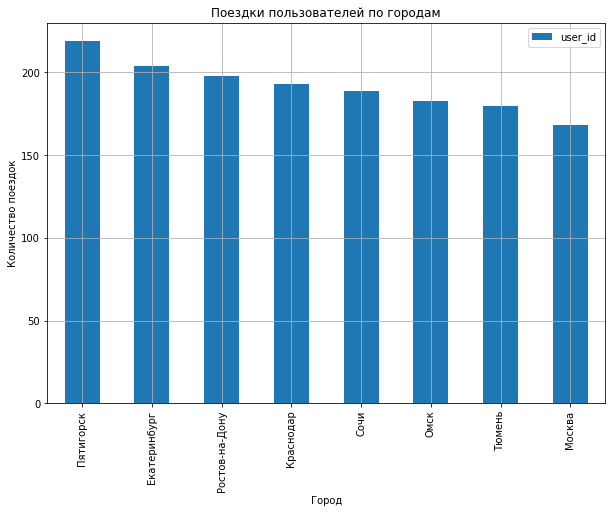

In [ ]:
users_go_city.plot(kind='bar', grid=True, figsize=(10, 7))
# название гистограммы
plt.title("Поездки пользователей по городам")
# подписи осей
plt.xlabel("Город")
plt.ylabel("Количество поездок")
# отображение графика
plt.show();

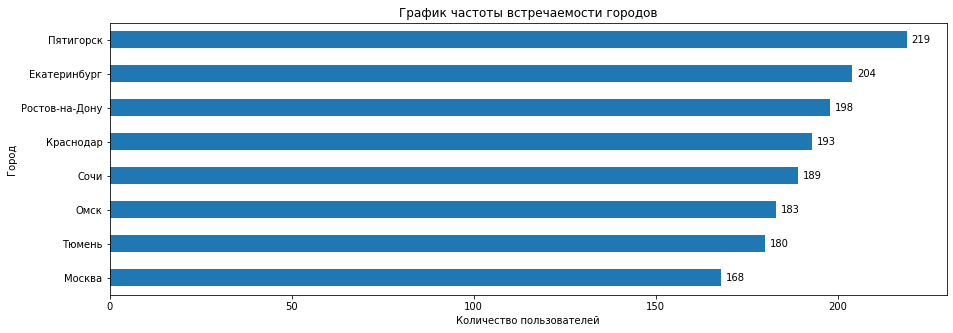

In [ ]:
# Создаем копию датасета, что бы не работать с исходным
tmp = users_go.copy()

# Построение горизонтальной диаграммы
ax = tmp['city'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(15, 5),
    title='График частоты встречаемости городов'
)

# Добавление значений рядом со столбцами
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Добавление меток осей
plt.xlabel('Количество пользователей')
plt.ylabel('Город')

# Отображение графика
plt.show()

##### Соотношение пользователей с подпиской (ultra) и без (free)

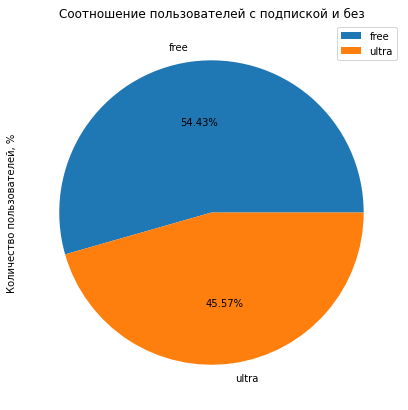

In [ ]:
(
    users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .plot.pie(y='user_id', figsize=(7,7),  label='Количество пользователей, %',
    autopct='%1.2f%%', title='Соотношение пользователей с подпиской и без')

)
plt.show()


##### Воозраст пользователей

In [ ]:
print('Средний возраст пользователей', users_go['age'].mean().round())
users_go['age'].describe()

Средний возраст пользователей 25.0


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

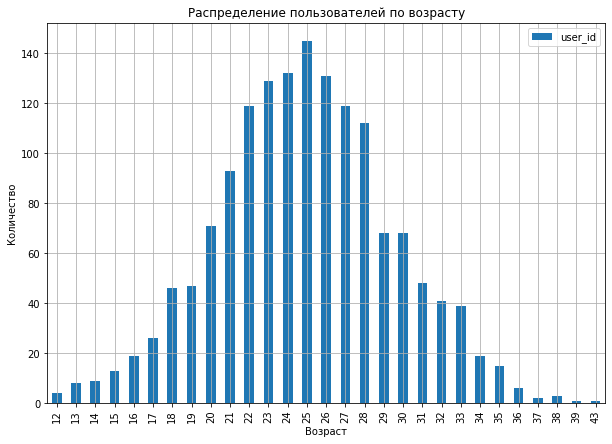

In [ ]:
(
    users_go.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True)
    .plot(kind='bar' , grid=True, figsize=(10, 7))
)
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

##### Расстояние одной поездки пользователя

In [ ]:
rides_go['distance'].describe().round()

count    18068.0
mean      3071.0
std       1117.0
min          1.0
25%       2543.0
50%       3134.0
75%       3776.0
max       7211.0
Name: distance, dtype: float64

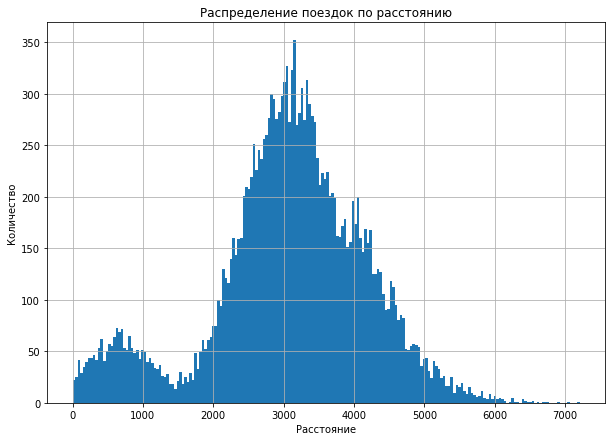

In [ ]:
rides_go['distance'].hist(bins=200, figsize=(10, 7))
plt.title('Распределение поездок по расстоянию') # название гистограммы
plt.xlabel('Расстояние') # подпись оси X
plt.ylabel('Количество') # подпись оси Y
plt.show()

##### Продолжительность поездок пользователей в минутах

In [ ]:
rides_go['duration'].describe().round(0)

count    18068.0
mean        18.0
std          6.0
min          0.0
25%         14.0
50%         18.0
75%         22.0
max         41.0
Name: duration, dtype: float64

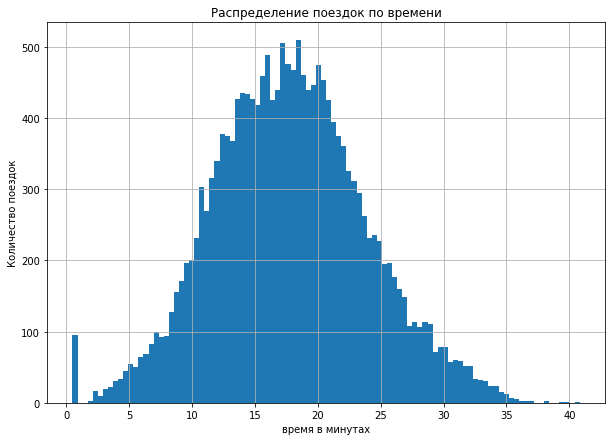

In [ ]:
rides_go['duration'].hist(bins=100, figsize=(10, 7))
plt.title('Распределение поездок по времени') # название гистограммы
plt.xlabel('время в минутах') # подпись оси X
plt.ylabel('Количество поездок') # подпись оси Y
plt.show()

<div class="alert alert-block alert-info">
<b>Вывод:</b>

1. Услугами сервиса аренды самокатов пользуются больше всего в Пятигорске, Екатеринбурге и Ростове на Дону, меньше всего - в Тюмени и Москве.

2. Пользователей без подписки (free) - 54,4%  с подпиской (ultra) - 45,6%.

3. Средний возраст пользователя подчиняется нормальному распределению с медианой примерно в 25 лет. Средний возраст и медиана совпадают. Имеется нарушение правил использования самокатов - некоторые пользователи несовершеннолетние (12-17 лет).

4. Медиана расстояния поездок - 3133 метров. Гистограмма имеет нормальное распределение зависимости с основным пиком 3130 м и второстепенным около 750 м.

5. Медиана продолжительности поездок - 18 минут. Гистограмма имеет нормальное распределение зависимости. Также есть аномальное время ~100 поездок с временем около 1 минуты.</div>

#### Шаг 4. Объединение данных

##### Объединение данных о пользователях, поездках и подписках в один датафрейм методом merge()

In [ ]:
data = pd.merge(users_go, subscriptions_go, on='subscription_type')
data = pd.merge(rides_go, data, on='user_id')
print('Количество явных дубликатов в `data` = ', data.duplicated().sum(), '\n')
data.info()

Количество явных дубликатов в `data` =  0 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+

In [ ]:
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


##### Создание датафреймов из data c данными о пользователях без подписки и с подпиской.

In [ ]:
data_free = data[data['subscription_type'] == 'free']
data_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [ ]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий ultra и free

In [ ]:
display(data_free['distance'].describe().round())
data_ultra['distance'].describe().round()

count    11568.0
mean      3045.0
std       1246.0
min          1.0
25%       2367.0
50%       3115.0
75%       3906.0
max       7211.0
Name: distance, dtype: float64

count    6500.0
mean     3115.0
std       837.0
min       244.0
25%      2785.0
50%      3149.0
75%      3561.0
max      5700.0
Name: distance, dtype: float64

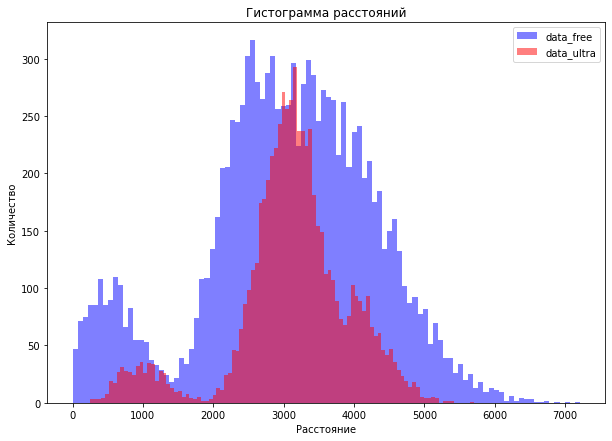

In [ ]:
# Построение гистограммы
plt.figure(figsize=(10, 7))
plt.hist(data_free['distance'], color='blue', bins=100, alpha=0.5, label='data_free')
plt.hist(data_ultra['distance'], color='red', bins=100, alpha=0.5, label='data_ultra')

# Настройка осей
plt.xlabel('Расстояние')
plt.ylabel('Количество')
plt.title('Гистограмма расстояний')
plt.legend()

# Отображение графика
plt.show()

In [ ]:
display(data_free['duration'].describe().round())
data_ultra['duration'].describe().round()

count    11568.0
mean        17.0
std          6.0
min          0.0
25%         13.0
50%         17.0
75%         22.0
max         35.0
Name: duration, dtype: float64

count    6500.0
mean       19.0
std         6.0
min         4.0
25%        15.0
50%        18.0
75%        22.0
max        41.0
Name: duration, dtype: float64

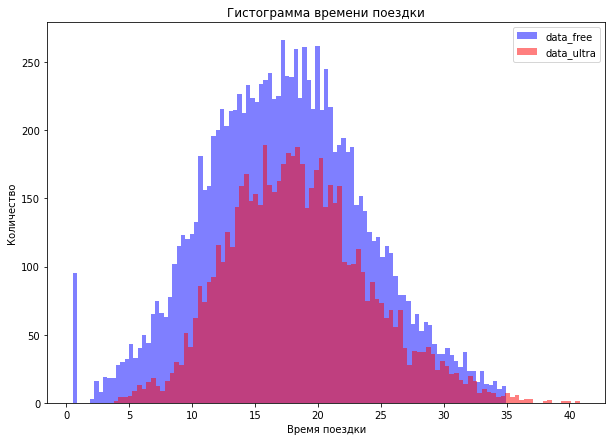

In [ ]:
# Построение гистограммы
plt.figure(figsize=(10, 7))
plt.hist(data_free['duration'], color='blue', bins=100, alpha=0.5, label='data_free')
plt.hist(data_ultra['duration'], color='red', bins=100, alpha=0.5, label='data_ultra')

# Настройка осей
plt.xlabel('Время поездки')
plt.ylabel('Количество')
plt.title('Гистограмма времени поездки')
plt.legend()

# Отображение графика
plt.show()

<div class="alert alert-block alert-info">
<b>Вывод:</b>

1. Созданный датафрейм data объединяет таблицы rides_go, users_go, subscriptions_go. Имеет 18068 строк во всех столбцах, что соответствует исходной таблице rides_go. Нет пропусков и явных дубликатов.

2. Созданы два датафрейма данных пользователей без подписки (free, 11568 записей) и с подпиской (ultra, 6500 записей).

3. Визуализация датафреймов зависимости расстяния поездок пользователей показывает, что подписка влияет на медиану (расстояние без подписки 3115, а с подпиской - 3149 метров). У пользователей с подпиской меньшее стандартное отклонение: free - 1246 ultra - 837. Также наблюдается смешение дополнительного пика с 600 м (free) до 1000 м (ultra).

4. Визуализация датафреймов зависимости времени поездок пользователям показывает, что подписка влияет на медиану (без подписки - 18 мин с подпиской - 19 мин). Также в подписке ultra отсуствует выброс по времени поедки продолжительностью около 1 мин.

Итог: Подписка влияет как на расстояние, так и на время поездок пользователей.</div>

#### Шаг 5. Подсчёт выручки

##### Создание датафрейма с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. receipts

In [ ]:
data['duration'] = np.ceil(data['duration']) # округление времени поездки до полных минут

users_months_merge = data.pivot_table(
    index=('user_id', 'month'),
    values=(
        'distance',
        'duration',
        'minute_price',
        'start_ride_price',
        'subscription_fee'
    ),
    aggfunc=({'distance':{'count', 'sum'},
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',})
)

users_months_merge.columns = [
    'count', 'distance',
    'duration',
    'minute_price',
    'start_ride_price',
    'subscription_fee'
]

users_months_merge.head(10)

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
        12         2   6751.629942      28.0             6                 0   
2       3          3  10187.723006      63.0             6                 0   
        4          2   6164.381824      40.0             6                 0   
        6          1   3255.338202      14.0             6                 0   
        7          2   6780.722964      48.0             6                 0   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
        12                  199  
2       3                   199  
        4                   199  
        6                   199  
        7                   199

In [ ]:
users_months_merge.isnull().sum() # проверка пропусков значений

count               0
distance            0
duration            0
minute_price        0
start_ride_price    0
subscription_fee    0
dtype: int64

##### В датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [ ]:
users_months_merge['receipts'] = (
users_months_merge['start_ride_price']*users_months_merge['count']+
users_months_merge['minute_price']*users_months_merge['duration']+
users_months_merge['subscription_fee'])
display('Таблица с помесячной выручкой по пользователям')
display(users_months_merge['receipts'].head(10))
print('Общая выручка компании GoFast:', users_months_merge['receipts'].sum(), 'рублей')


'Таблица с помесячной выручкой по пользователям'

user_id  month
1        1        451.0
         4        241.0
         8        475.0
         10       391.0
         11       535.0
         12       367.0
2        3        577.0
         4        439.0
         6        283.0
         7        487.0
Name: receipts, dtype: float64

Общая выручка компании GoFast: 3878641.0 рублей


<div class="alert alert-block alert-info">
<b>Вывод:</b>

Выручка компании GoFast от аренды самокатов за период - 3 878 641.00 рублей</div>

In [ ]:
# Комментарий ревьюера
# Контроль суммы выручки
tmp, col_rev = users_months_merge.copy(), 'receipts'
print("Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице:", tmp[col_rev].sum())

Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице: 3878641.0


#### Шаг 6. Проверка гипотез

##### Проверка утверждений: тратят ли пользователи с подпиской больше времени на поездки и выгоднее ли пользователи с подпиской для компании. Проверка гипотез: Н0: Средняя продолжительность поездок с подпиской и без равны. Н1: Средняя продолжительность поездок с подпиской больше,чем без подписок.

In [ ]:
results = st.ttest_ind(
    data_ultra['duration'], data_free['duration'], equal_var=True,
    alternative='greater')
print('P-value =', results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем гипотезу H0')
else:
    print('Гипотезу H0 нельзя отвергнуть')

P-value = 1.2804098316645618e-34
Отвергаем гипотезу H0


<div class="alert alert-block alert-info">
<b>Вывод:</b>

Можно утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при уровне значимости в 5 %.</div>

##### Оптимальное расстояние одной поездки для износа самоката - 3130 м. Проверка утверждения, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает это значение. Проверка гипотез: Н0: Среднее расстояние поездок с подпиской равно 3130 метров. Н1: Среднее расстояние поездок с подпиской больше 3130 м.

In [ ]:
distance = 3130
results = st.ttest_1samp(
    data_ultra['distance'],
    distance,
    alternative='greater')
alpha = 0.05
print('P-value =', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем гипотезу H0')
else:
    print('Гипотезу H0 нельзя отвергнуть')

P-value = 0.9195368847849785
Гипотезу H0 нельзя отвергнуть


<div class="alert alert-block alert-info">
<b>Вывод:</b>

Можно утверждать, что среднее расстояние поездки пользователей с подпиской, не превышает оптимальное для износа самоката расстоянием 3130 метров, при уровне значимости в 5 %.</div>

##### Проверка гипотезы, что помесячная выручка от пользователей с подпиской по месяцам выше, чем без. Гипотезы: Н0: Помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке без подписки. Н1: Помесячная средняя выручка от пользователей с подпиской больше, чем без подписки.

In [ ]:
results = st.ttest_ind(
    users_months_merge.loc[users_months_merge['subscription_fee'] > 0, 'receipts'],
    users_months_merge.loc[users_months_merge['subscription_fee'] == 0, 'receipts'],
    equal_var=True,
    alternative='greater')
print('P-value =', results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем гипотезу H0')
else:
    print('Гипотезу H0 нельзя отвергнуть')

P-value = 1.8850394384715216e-31
Отвергаем гипотезу H0


<div class="alert alert-block alert-info">
<b>Вывод:</b>

Можно утверждать, что средняя месячная выручка от пользователей с подпиской, больше, чем от пользователей без подписки, при уровне значимости 5 %.</div>

##### Техническая команда компании GoFast обновила сервера, с которыми взаимодействует мобильное приложение. Есть надежда, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после. Какой тест понадобился бы для проверки гипотезы?

<div class="alert alert-block alert-info">
<b>Ответ:</b>

Данные о количестве обращений до обновления и после - это две зависимые выборки. Переменная измеряется дважды (количество обращений до обновления и после) для одних и тех же пользователей и имеют одинаковый размер. Можно применить метод scipy.stats.ttest_rel() для теста гипотезы, что истинное среднее значение генеральной выборки до изменения больше, чем после обновления сервера. Также необхлдимо указать параметр alternative="less".</div>

<div class="alert alert-block alert-info">
<b>Вывод:</b>

1. Можно утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при уровне значимости в 5 %.
2. Можно утверждать, что среднее расстояние поездки пользователей с подпиской, не превышает оптимальное для износа самоката расстоянием 3130 метров, при уровне значимости в 5 %.
3. Можно утверждать, что средняя месячная выручка от пользователей с подпиской, больше, чем от пользователей без подписки, при уровне значимости 5 %.
4. Можно применить метод scipy.stats.ttest_rel() для теста гипотезы, что истинное среднее значение генеральной выборки до изменения больше, чем после обновления сервера, с параметром alternative="less".</div>

#### Шаг 7. Распределения

##### Отделу маркетинга GoFast поставили задачу: провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить подписку. По завершении периода действия подписки пользователь может либо отказаться, либо продлить, совершив платёж.  Акция уже проводилась ранее и выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Необходимо выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %.  Для решения задачи нужно использовать биномиальное распределение, которое описывает ситуацию. Затем подобрать подходящее значение параметра N для заданного параметра p=0.1 с помощью графиков и метода cdf() .

При раздаче 1172 промокодов вероятность невыполнения плана < 5.0 %


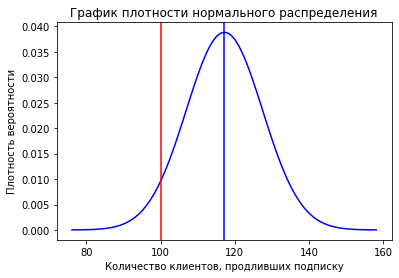

In [ ]:
n = 1000
p = 0.1
k = 100
binom_cdf = 0.05

while binom_cdf < binom.cdf(k, n, p):
    n += 1
print(f'При раздаче {n} промокодов вероятность невыполнения плана < {binom.cdf(k, n, p).round(2)*100} %')

# математическое ожидание и стандартное отклонение биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

arange = np.arange ((mu - 4 * sigma), (mu + 4 * sigma), 1)

plt.plot(arange, st.norm.pdf(arange , mu, sigma), 'b-')
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='blue')
# название графика
plt.title("График плотности нормального распределения")
# подписи осей
plt.xlabel("Количество клиентов, продливших подписку")
plt.ylabel("Плотность вероятности")
plt.show()

<div class="alert alert-block alert-info">
<b>Вывод:</b>

Необходимо раздать подписчикам не менее 1172 промокодов, чтобы минимум 100 существующих клиентов продлили подписку (обычно продлевают подписку 10% пользователей) с вероятностью невыполнения плана - 5%.</div>

##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении.  Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте график распределения и оцените вероятность, что уведомление откроют не более  399,5 тыс. пользователей. Для решения задачи можно воспользоваться нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.

Вероятность открытия не более 399,5 тысяч уведомлений: 15.4 %


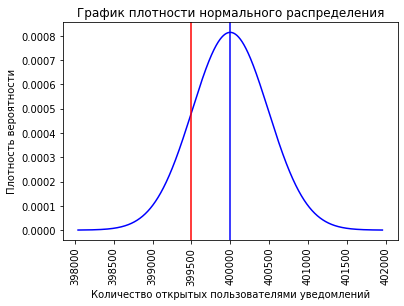

In [ ]:
n = 1000000
p = 0.4
k = 399500
# математическое ожидание и стандартное отклонение нормального распределения равны
# математическое ожидание и стандартное отклонение биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

# задание нормального распределения и вычисление вероятность левого хвоста от 399.5 тысяч
result = st.norm(mu, sigma).cdf(k)
print('Вероятность открытия не более 399,5 тысяч уведомлений:', result.round(3)*100, '%')

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)
plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.xticks(rotation=90)
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='blue')
# название графика
plt.title("График плотности нормального распределения")
# подписи осей
plt.xlabel("Количество открытых пользователями уведомлений")
plt.ylabel("Плотность вероятности")
plt.show()

<div class="alert alert-block alert-info">
<b>Вывод:</b>
Если разослать 1 млн уведомлений (откроют 40 % получивших), тогда вероятность, что уведомление откроют не более 399,5 тыс. пользователей - 15,4%.</div>

<div class="alert alert-block alert-info">
<b>Вывод по проекту "Статистический анализ данных":</b>

**Задание проекта:**

Сервис аренды самокатов GoFast передал для анализа данные о поездках пользователяе из нескольких городов. Необходимо провести исследование и проверить некоторые гипотезы, которые могут помочь бизнесу компании.

Для исследования данных произведен импорт необходимых библиотек python: pandas, matplotlib.pyplot, numpy, from scipy import stats, from scipy.stats import binom.
    
Загружены файлы CSV с данными: датафрейм users_go.csv со столбцами - user_id - уникальный идентификатор пользователя, name - имя пользователя, age - возраст, city- город; датафрейм rides_go.csv со столбцами - user_id - уникальный идентификатор пользователя, distance - расстояние, которое пользователь проехал в метрах, duration - продолжительность поездки в минутах,
date - дата поездки; датафрейм subscriptions_go.csv со столбцами - subscription_type - тип подписки. minute_price - стоимость минуты поездки по подписке. start_ride_price - стоимость начала поездки, subscription_fee - стоимость ежемесячного платежа.

**Предобработка данных:**
    
Слелана предобработка данных: датафрейм users_go содеожит 1565 записи, без пропусков нет, явные дубликаты 31 шт. - удалены (осталось 1534 уникальных записей). Датафрейм rides_go содержит 18068 записи, пропусков и явных дубликатов нет, некорректный фомат даты object изменен на datetime64[ns]. Датафрейм subscriptions_go - 2 записи, пропусков и дубликатов нет. Наименования столбцов всех датафреймов корректные, в змеином регистре.

**Промежуточные выводы:**
    
1. Услугами сервиса аренды самокатов пользуются больше всего в Пятигорске, Екатеринбурге и Ростове на Дону, меньше всего - в Тюмени и Москве.

2. Пользователей без подписки (free) ~ 54% с подпиской (ultra) ~ 46%.

3. Средний возраст пользователя подчиняется нормальному распределению с медианой примерно в 25 лет. Средний возраст и медиана совпадают. Среди пользователей есть несовершеннолетние (12-17 лет) - это нарушение правил использования самокатов в РФ.

4. Медиана расстояния поездок - 3133 метров. Гистограмма имеет нормальное распределение зависимости с основным пиком 3130 м и второстепенным около 750 м.

5. Медиана продолжительности поездок - 18 минут. Гистограмма имеет нормальное распределение зависимости. Также есть аномальное время ~100 поездок с временем около 1 минуты.

6. Визуализация датафреймов зависимости расстяния поездок пользователей показывает, что подписка влияет на медиану (расстояние без подписки 3115, а с подпиской - 3149 метров). У пользователей с подпиской меньшее стандартное отклонение: free - 1246, ultra - 837. Также наблюдается смешение дополнительного пика с 600 м (free) до 1000 м (ultra).

7. Визуализация датафреймов зависимости времени поездок пользователям показывает, что подписка влияет на медиану (без подписки - 18 мин с подпиской - 19 мин). Также в подписке ultra отсуствует выброс по времени поедки продолжительностью около 1 мин.

8. Подписка влияет как на расстояние, так и на время поездок пользователей.

9. Выручка компании GoFast от аренды самокатов за период - 3 878 641.00 рублей.

10. Можно утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при уровне значимости в 5 %.

11. Можно утверждать, что среднее расстояние поездки пользователей с подпиской, не превышает оптимальное для износа самоката расстоянием 3130 метров, при уровне значимости в 5 %.

12. Можно утверждать, что средняя месячная выручка от пользователей с подпиской, больше, чем от пользователей без подписки, при уровне значимости 5 %.

13. Техническая команда компании GoFast обновила сервера, с которыми взаимодействует мобильное приложение. Можно применить метод scipy.stats.ttest_rel() для теста гипотезы, что истинное среднее значение генеральной выборки до изменения больше, чем после обновления сервера, с параметром alternative="less".

14. Необходимо раздать подписчикам не менее 1172 промокодов, чтобы минимум 100 существующих клиентов продлили подписку (обычно продлевают подписку 10% пользователей) с вероятностью невыполнения плана - 5%.

15. Если разослать 1 млн уведомлений (откроют 40 % получивших), тогда вероятность, что уведомление откроют не более 399,5 тыс. пользователей - 15,4%.</div>


<div class="alert alert-block alert-info">
<b>Резюме:    

Пользователи с подпиской (ultra) более выгодные для сервиса аренды самокатов GoFast, чем без подписки (free). Поэтому компании для увеличения выручки необходимо стимулировать клиентов оформлять подписку ultra.</b></div>